# Financial Markets

Coursera, Yale.
Prof. Robert Shiller.

## Lesson 1: Introduction

- A lot of money can be done in finance, some use it for good, other for bad
- Carnegie, wealthy businessman, said you need to retire early if you get rich and become a philanthropist

## Lesson 2: Risk

### Value at Risk = VAR: Risk measurement metric
- Coined after the crash in 1987
- Risk of a portfolio
- 1% one-year VaR of 10 million = 1% chance that portfolio will lose 10 million in a year

### Stress Tests: another risk measurement metric
- Popular after the 2008 crash
- Method of assessing risk of firms or portfolios
- Details and vulnerabilities are observed, and evaluated as if a crisis would come - would the company stand a crisis?
- At least 3 different economic scenarios are considered for the stress
- USA, EU, UK, China, all do that
- Do they work? There are some critics - basically, they say they lack of imagination of what could happen, so they underestimate the problems
- Usually it’s an issue making public bad results of stress tests, because other businesses won’t want to make business with you

### SP500 Stock index: average of 500 stocks
- Crashes: 2000, 2008
- Quite unstable in period 2000-2016
- Truth is: very difficult to predict
- Apple stock superimposed: Apple was much better than SP500!
    - However, when returns plotted, we see there’s a lot of noise
    - Apple goes up and down so much from month to month, sometimes 60%!
- Scatterplot: returns Apple vs SP500: they seem to be correlated
    - Apple is more variable
    - Slope (beta): 1.45 -> Apple overreacts to SP500
    - Beta of the stock: slope of the stock model against the aggregate market value
- NOTE: in economy/finance, regression is modeled as: y = beta*x + alpha
    - X: return of the market (eg, SP500)
    - Y: return of a stock (eg, Apple)

In [1]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
start = datetime.datetime(2000, 1, 1)
end = datetime.datetime(2016, 12, 31)

In [4]:
SP500 = data.DataReader("^GSPC", 'yahoo', start, end)
APPLE = data.DataReader("AAPL", 'yahoo', start, end)

In [5]:
SP500.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1478.000000,1438.359985,1469.250000,1455.219971,931800000,1455.219971
2000-01-04,1455.219971,1397.430054,1455.219971,1399.420044,1009000000,1399.420044
2000-01-05,1413.270020,1377.680054,1399.420044,1402.109985,1085500000,1402.109985
2000-01-06,1411.900024,1392.099976,1402.109985,1403.449951,1092300000,1403.449951
2000-01-07,1441.469971,1400.729980,1403.449951,1441.469971,1225200000,1441.469971


In [6]:
APPLE.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2000-01-03,1.004464,0.907924,0.936384,0.999442,535796800.0,0.862169
2000-01-04,0.987723,0.903460,0.966518,0.915179,512377600.0,0.789480
2000-01-05,0.987165,0.919643,0.926339,0.928571,778321600.0,0.801032
2000-01-06,0.955357,0.848214,0.947545,0.848214,767972800.0,0.731712
2000-01-07,0.901786,0.852679,0.861607,0.888393,460734400.0,0.766373


In [7]:
tickers = ['SP500', 'APPLE']
stocks = pd.concat([SP500, APPLE], axis=1, keys=tickers)
stocks.columns.names = ['Name/Ticker','Stock Info']

In [8]:
stocks.xs(key='Close',axis=1,level='Stock Info').max()

Name/Ticker
SP500    2271.719971
APPLE      33.250000
dtype: float64

In [9]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = stocks[tick]['Close'].pct_change()
# The return percent of the first day is NaN
returns.head()

,SP500 Return,APPLE Return
Date,,
2000-01-03,NaN,NaN
2000-01-04,-0.038345,-0.084310
2000-01-05,0.001922,0.014633
2000-01-06,0.000956,-0.086538
2000-01-07,0.027090,0.047369


<Figure size 720x720 with 0 Axes>

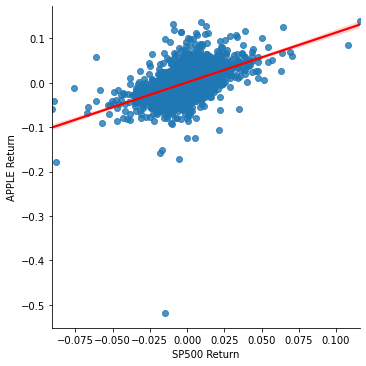

In [10]:
# Plot everything which is not NaN
plt.figure(figsize=(10,10))
#sns.scatterplot(data=returns,x='SP500 Return',y='APPLE Return')
sns.lmplot(data=returns.dropna(),x='SP500 Return',y='APPLE Return',line_kws={'color': 'red'})

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(returns[['SP500 Return']].dropna(),returns[['APPLE Return']].dropna())

/Users/mxagar/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/base.py:503: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Intercept (Alpha): ', lm.intercept_)
print('Slope (Beta): ', lm.coef_)

Intercept (Alpha):  [0.00096402]
Slope (Beta):  [[1.1207916]]


<AxesSubplot:xlabel='SP500 Return', ylabel='Count'>

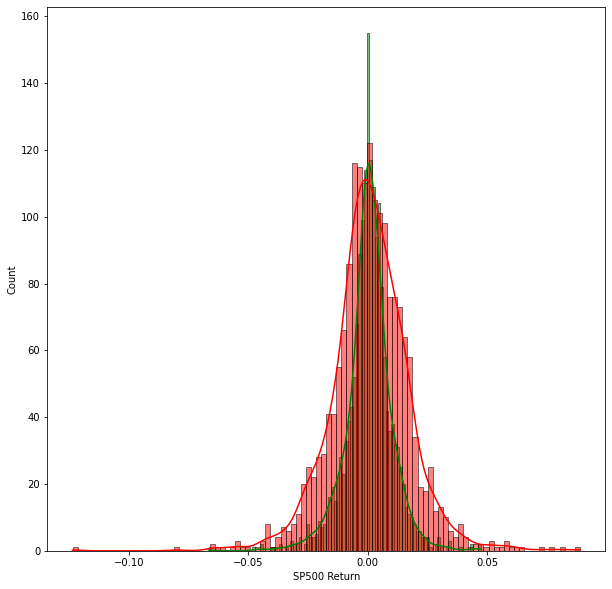

In [15]:
# Histrogram of returns in a time period
plt.figure(figsize=(10,10))
sns.histplot(returns.loc['2010-01-01':'2016-12-31']['SP500 Return'],
             color='green',
             bins=100,
             kde=True)
sns.histplot(returns.loc['2010-01-01':'2016-12-31']['APPLE Return'],
             color='red',
             bins=100,
             kde=True)

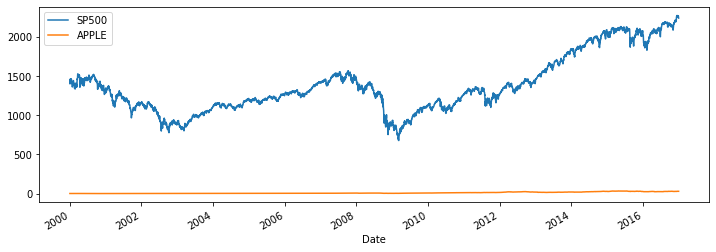

In [16]:
for tick in tickers:
    stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()

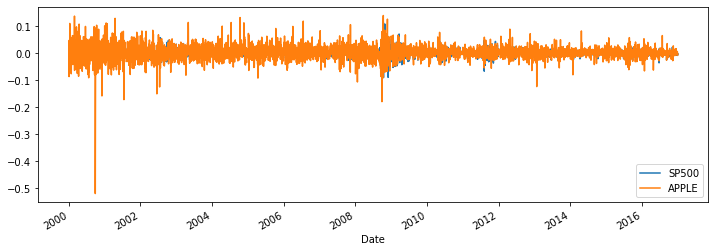

In [17]:
returns['SP500 Return'].plot(figsize=(12,4),label=tickers[0])
returns['APPLE Return'].plot(figsize=(12,4),label=tickers[1])
plt.legend()

### Market risk vs idiosyncratic risk
- Market risk: systematic risk, events or conditions that affect to everybody
- Idiosyncratic risk: death of Steve Jobs

### Outliers
- Normal distribution: typical for random variables
    - Two parameters: mean, standard deviation
- **Important: Finance variables usually don't follow the normal distribution!!**
- There are other distributions that characterize better finance data
    - Cauchy distribution: data samples look like normal, but they have sudden large outliers because it's fat-tailed distribution. The distribution curve is like a normal that has been squeezed in the peak, such that its tails are thicker
    - The effect of a Cauchy distribution are large changes every now and then
    - This is the essence of Black Swans (Taleb): fat-tailed distributions produce black swan events
    - The key idea is that while a normal distribution says it's almost impossible to have a tail event, a fat-tailed distribution says it's actually probable for it to happen
- Central limit theorem
    - Large samples of variables tend to be normally distributed
    - BUT: the theorem can fail if
        - underlying variables are fat-tailed, as usually happens with finance data
        - underlying variables loose their independence, which also happens in finance

### Covariance
- Analogous to variance, but applied to two independent variables
    - If 0: both are independent: that's good for finance
    - If > 0: they are both related, if one gains, the other too: don't pick two stocks that are related!
    - If < 0: one gaining means the other failing
    - **The COVARIANCE is the real risk!**
- Investors shouldn't buy only one stock, but as much as possible to lower risk
- Beta(stock) = COV(stock,market)/VAR(market)
    - We scale the covariance with the market variance

## Lesson 3: Insurance

### Insurance
- Policy holders have a contract with an insurance company, they pay a premium and get a service in case they are injured
- Issues and principles in insurance
    - Risk pooling
    - Moral Hazard
    - Selection bias
- Risk pooling
    - for n independent policies of probability p of claim, the number of claims follows the binomial distribution
    - standard deviation would be sqrt(p(1-p)/n)
    - when n gets large, the standard deviatoin approaches to 0! That's the law of large numbers
    - Law of large numbers
        - a random variable occurring several times independently approaches its expected value and the standard deviation approaches to zero
    - Therefore: a large insurance company with many policies
        - knows the number of claims: it is the mean or expected value of the distribution
        - the expected value will deviate very few, because the standard deviation will be 0
        - thus, insurance companies take few risk!
- Moral Hazard: people take more risk when they are insured, even becoming irresponsible
- Selection Bias: insurances attrack usually sick people; they need to screen people; if only sick people went to insurances, the system would collapse
- Some notes on insurances
    - Weather is starting to be insured, important for developing countries
    - Some insurances have been made obligatory in order for people to don't make mistakes, eg. flood insurance: people can build houses on places at risk, but their insurance is very expensive!

### History of insurance
- 1600: life tables appear: death probabilities for age; important for life insurance
    - However, people were suspicious
- 1840: insurance salesmen start selling insurance in USA
    - It was a difficult start, but it worked

### Insurance Regulation
- Insurance regulation is often locally regulated in USA
- Since the 70's, insurance companies are insured also, in case they fail
- "Too big to fail" is a fundamental problem in today's world: if very large insurance companies or any company fails, the gobernment feels often they need to save them to avoid larger disasters - bail outs happen

### Health Insurance
- Before insurance, doctor made more money with sick people
    - Instead, a doctor should give preventive care
- With insurance, doctors have non incentives to earn money from sick people or perform unnecessary surgeries
- Obamacare tried to make insurance obligatory to overcome the selection bias

### Disasters
- Earthquakes, floods, hurricanes, ... it's a pitty people are not insured against them
- After 2001 insurance policies included in their texts that they don't insure agains terrorism attacks
    - Later, the USA obliged the inssurance companies to include it, but the expenses were mainly paid by the government
    - The problem is, nobody knows were terrorism is going, it's difficult to predict anything

### Binomial Distribution


In [76]:
import numpy as np
from scipy.stats import binom
from matplotlib import pyplot as plt
%matplotlib inline

In [77]:
n_values = [20, 20, 40]
b_values = [0.2, 0.6, 0.6]
linestyles = ['-', '--', ':']
x = np.arange(-1, 200)

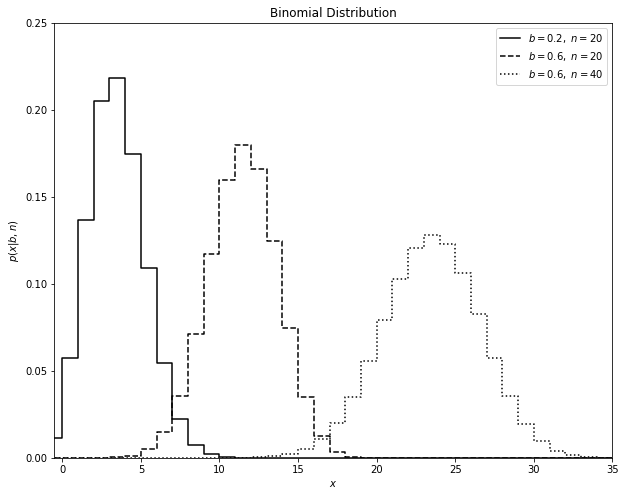

In [79]:
fig, ax = plt.subplots(figsize=(10, 8))
for (n, b, ls) in zip(n_values, b_values, linestyles):
    dist = binom(n, b)
    plt.step(x, dist.pmf(x), color='black', linestyle=ls, label='$b={},\ n={}$'.format(b, n))

plt.xlim(-0.5, 35)
plt.ylim(0, 0.25)

plt.xlabel('$x$')
plt.ylabel('$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

In [69]:
# Five random numbers in the Binomial distirbution B(40,0.6)
dist = binom(40, 0.6)
dist.rvs(5)

array([21, 24, 28, 25, 26])

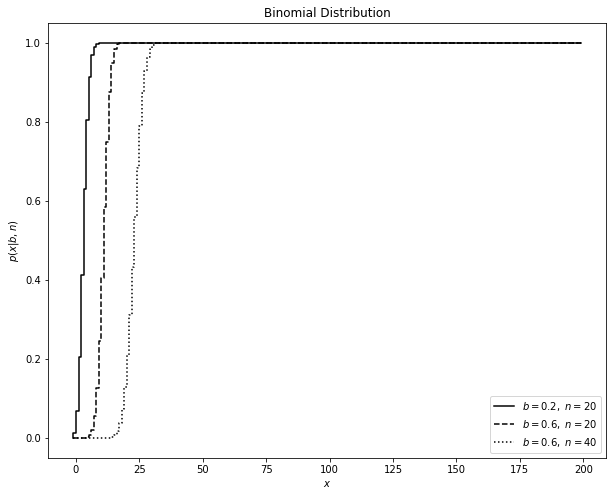

In [70]:
fig, ax = plt.subplots(figsize=(10, 8))
for (n, b, ls) in zip(n_values, b_values, linestyles):
    dist = binom(n, b)
    plt.step(x, dist.cdf(x), color='black', linestyle=ls, label='$b={},\ n={}$'.format(b, n))

plt.xlabel('$x$')
plt.ylabel('$p(x|b, n)$')
plt.title('Binomial Distribution')

plt.legend()
plt.show()

### Normal Distribution

In [31]:
import numpy as np
from scipy.stats import norm
from matplotlib import pyplot as plt
%matplotlib inline

In [51]:
m_values = [0, 0, 1]
s_values = [0.5, 1, 1]
linestyles = ['-', '--', ':']
x = np.arange(-5, 5, 0.1)

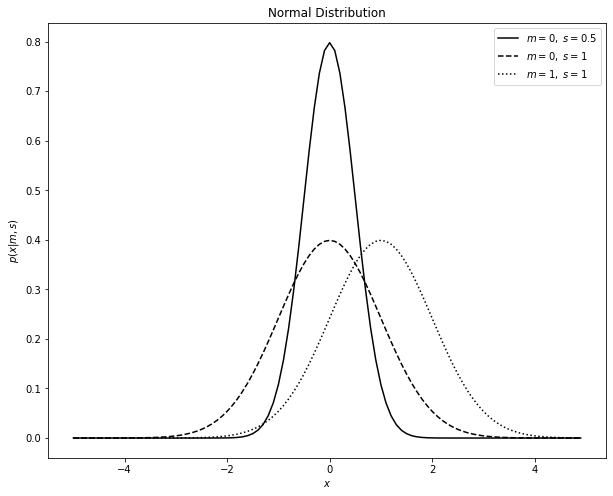

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
for (m, s, ls) in zip(m_values, s_values, linestyles):
    dist = norm(m, s)
    plt.plot(x, dist.pdf(x), color='black', linestyle=ls, label='$m={},\ s={}$'.format(m, s))

plt.xlabel('$x$')
plt.ylabel('$p(x|m, s)$')
plt.title('Normal Distribution')

plt.legend()
plt.show()

In [62]:
# Five random numbers in the Normal distirbution N(1,1)
dist = norm(1, 1)
dist.rvs(5)

array([0.84848368, 1.55972758, 0.6751322 , 1.08219981, 0.45284597])

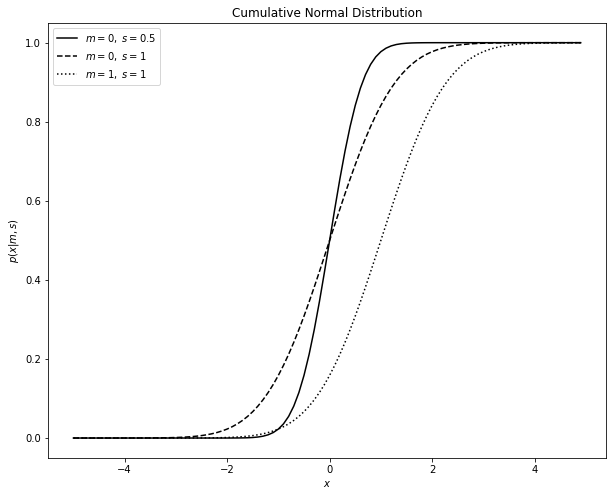

In [64]:
fig, ax = plt.subplots(figsize=(10, 8))
for (m, s, ls) in zip(m_values, s_values, linestyles):
    dist = norm(m, s)
    plt.plot(x, dist.cdf(x), color='black', linestyle=ls, label='$m={},\ s={}$'.format(m, s))

plt.xlabel('$x$')
plt.ylabel('$p(x|m, s)$')
plt.title('Cumulative Normal Distribution')

plt.legend()
plt.show()

### Cauchy Distribution

In [53]:
import numpy as np
from scipy.stats import cauchy
from matplotlib import pyplot as plt
%matplotlib inline

In [71]:
z_values = [0, 0, 1]
g_values = [0.5, 1, 1]
linestyles = ['-', '--', ':']
x = np.arange(-5, 5, 0.1)

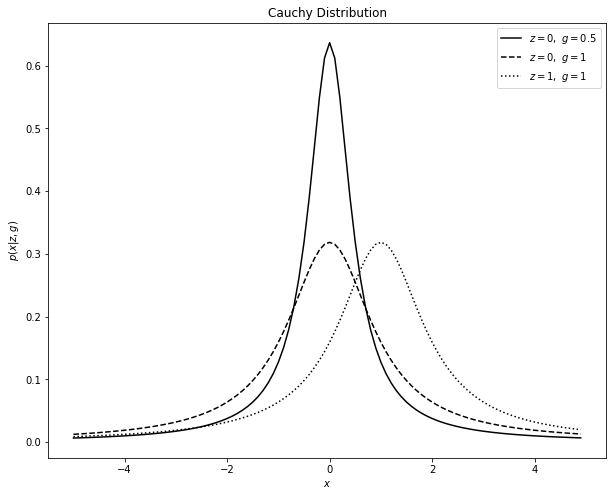

In [72]:
fig, ax = plt.subplots(figsize=(10, 8))
for (z, g, ls) in zip(m_values, s_values, linestyles):
    dist = cauchy(loc=z,scale=g)
    plt.plot(x, dist.pdf(x), color='black', linestyle=ls, label='$z={},\ g={}$'.format(z, g))

plt.xlabel('$x$')
plt.ylabel('$p(x|z, g)$')
plt.title('Cauchy Distribution')

plt.legend()
plt.show()

In [73]:
# Five random numbers in the Cauchy distirbution C(1,1)
dist = cauchy(1, 1)
dist.rvs(5)

array([  1.73813585, -10.93437506,   2.04641715,   1.52909599,
         3.34071645])

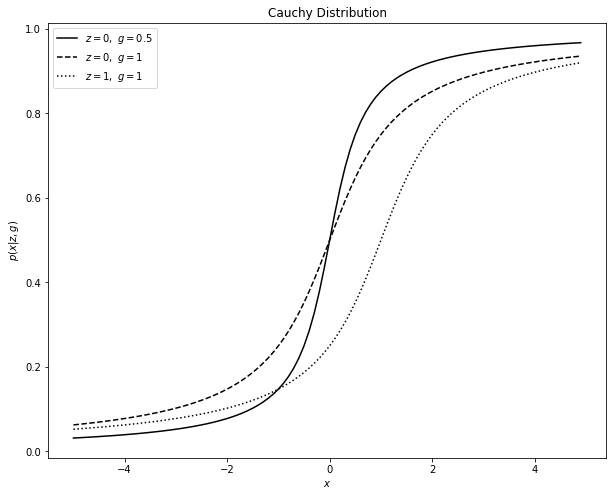

In [74]:
fig, ax = plt.subplots(figsize=(10, 8))
for (z, g, ls) in zip(m_values, s_values, linestyles):
    dist = cauchy(loc=z,scale=g)
    plt.plot(x, dist.cdf(x), color='black', linestyle=ls, label='$z={},\ g={}$'.format(z, g))

plt.xlabel('$x$')
plt.ylabel('$p(x|z, g)$')
plt.title('Cauchy Distribution')

plt.legend()
plt.show()

## Lesson 4: Models and Portfolio

### Eggs in one basket
- Diversification is a way of decreasing risk: don't put all your eggs in one basket
- Insurance is another way of diminishing risk, as we saw
- Mean and variance of the whole portfolio matter, not isolated stocks
- We can compute the covariance matrix of a portfolio

### Hedge Funds
- They are allowed to do sophisticated operations, not for the retail market
- They cannot advertise
- They do very risky things
- They have been doing well, but lately they haven't

### Risk Measures Post 2008
- Stress tests
- More effort is being take in how to assess risk

### Black Swans
- Big unexpected events
- It is very difficult to quantify and predict them -- but they happen!

### Labor Market Risk
- Unemployment tax is for that
- Unemployment aid for people to find a good job in some months
- It makes sense now more than ever: robotics, technology, everything evolves fast and human capital can become obsolete
- We want people to take more risks! The unemployment insurance allows that

### CAPM = Capital Asset Pricing Model
- Model of the optimal portfolio
- Scatterplot: returns market vs Apple
    - Beta slope: the return of Apple is determined by its beta
- We need to diversify
    - But that's difficult, because we need to buy comple stocks
- Solution: Investment Funds, which
- CAPM says we should have all types of assets, no matter their risk
    - Stocks, Real State, Commodities (Oil), ...
- Past behavior doesn't predict the future
- Beta slope transforms the market return to the concrete stock return
- Is high beta good?
    - Example: Apple has beta = 1.5
    - There might be many reasons why a company is high beta
        - They invest and create new products
        - They borrow a lot of money (investments); that doesn't need to be good
    - Gold is negative beta: when the market is doing bad, it's a save haven
    - Beta is about systemic risk; we have also the idiosyncratic risk of the company, that's why the scatterplot is not a perfect line; but we cannot control so much that risk
    - Higher neta means ultimately more risk
- The idea is to have all kinds of beta stocks/assets, because all can actually help!
- The CAPM model says:
    - r_i = r_f + beta*(r_market - r_f)
        - r_f: risk free??
- Key insights:
    - We want to have a portfolio with the lower variance possible
    - High betas are good for return, but increase variance, thus, they increase risk
    - Low betas seem to decrease return, but they are actually good, because they in fact decrease variance!
        - A negative beta stock can be seen as an insurance

### Short Selling
- You can have a negative amount of a stock: that happens with short selling
    - When we short sell a stock, we have a negative amount of it
- Having negative amounts of a stock could maybe help optimize in theory the portfolio?
- We won't take into account short selling for the CAPM model
- In 2008 short selling was briefly banned, because the US was afraid of having a 1929 scenario
- Short selling consists in borrowing a stock we think will go down
    - They sell the stock
    - It goes down
    - They buy it again
    - They return it to the owner
    - They income is: higher tosck price - lower - borrowing interests

### CAMP Assumptions
- The CAMP model makes two assumptions
    - Everybody is investing according to it
    - Everybody thinks rationally
- Those assumptions are not true, but the model is known and used

### Our Portfolio
- Imagine we have 1 dollar to invest
- We invest it in two stocks
    - Stock 1: x dollars, return r1
    - Stock 2: 1-x dollars, return r2
- Portfolio expected value (return): r = x * r1 + (1-x) * r2
- Portfolio variance: x^2 * var(r1) + (1-x)^2 * var(r2) + 2 * x * (1-x) * cov(r1,r2)

### Efficient Portfolio Frontier
- Standard deviation of the portfolio expressed in the return of the portfolio
- We get a C curve: each point is a different value of x for the 2 stocks in our portfolio
    - We don't want to be in the lower part of the C
- We add a third stock and compute a new C curve
- Now what??

### Myron Gordon: Present Value
- We have a land which produces a revenue X the first year
- We assume we have a growth rate g (due to technology, etc)
- The revenue in year n would be: X(1+g)^(n-1)
- Which is the Present Value (PV) of that land?
    - PV = X / (r - g)
    - Assuming g < r
    - The value is the infinite sum of a series
        - So in theory, the land is yielding infinitely...
    - r: constant cost of capital
    - So, every price below PV is a good investment! It doesn't matter if g is negative!
- We can apply this to stocks